# Problem Statement

When working for a consumer finance company which specialises in lending various types of loans to urban customers, every loan application to the organisation brings in two types of risk with the bank’s decision-

  <b>1. Not approving a loan to a good customer is loss to business</b>
  <br>
  <b>2. Approving loan to a customer who might default loan payment is a financial loss.</b>
   
Analysing past consumer traits might help the lending organisation to filter out customer who is probable to default a loan. Prime objective of this project is to understand borrower traits and identify the driver variables that would determine if a customer is probable to default the loan payment.

The provided dataset is loan.csv file, that contains information about past loan applicants and whether they ‘defaulted’ or not.

When a person applies for a loan, there are two types of decisions that could be taken by the company:
- <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:<br><br>
  - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
  - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

  - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan <br>
<br>
- <b>Loan rejected:</b> The company had rejected the loan (because the candidate does not meet their requirements etc.). 
<br>

Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

Analysig the file we need to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

We have used EDA to understand how consumer attributes and loan attributes influence the tendency of default.

#### Importing the packages

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [2]:
df=pd.read_csv('loan.csv')
pd.set_option('display.max_columns',None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Data Understanding & Cleaning

Here we understand the data & its significance and based on that we perfom cleaning as and when needed
##### Cleaning includes:
- Fixing rows & columns
- Fixing missing values
- Standardizing values
- Fixing invalid values
- Filtering Data


#### Checking the brief summary of the dataframe to 
- find total number of rows & columns before any processsing
- Columns names and data types
- Getting brief statistical information of the data which helps to form an idea about the values like range(min & max),percentiles(25,50 & 75),standard deviation(std), etc
- Checking for duplicate rows if any throughout the dataframe. Oberved below that there is no duplicate row.



In [3]:
#Understanding data
print(df.shape)
print(df.info(verbose=True,null_counts=True))
print(df.describe())
print("Number of duplicate rows: ",len(df[df.duplicated()]))

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership    

Number of duplicate rows:  0


#### Inferences:
- Observed that the dataset contains 39717 rows and 111 columns
- Memory usage is 33.6 MB
- There are no duplicate records in the dataset
- There are lot of null values in multiple columns

In [4]:
print("Percentage of null: ",round((df.isnull().sum().sum())/(df.shape[0]*df.shape[1])*100,2),'%')

Percentage of null:  51.34 %


Since we see there are numerous columns with null values throughout the sample. Having more than half of null values in a column would not make sense for our analysis. Lets us drop the columns that have more that 60% of nulls values.

In [5]:
df.dropna(thresh = df.shape[0]*0.6, how = 'all', axis = 1, inplace = True)

In [6]:
print("Dataset shape: ", df.shape)
print(df.isnull().sum())
print("Percentage of null: ",round((df.isnull().sum().sum())/(df.shape[0]*df.shape[1])*100,2),'%')

Dataset shape:  (39717, 54)
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0


We have reduced to only 0.81% nulls with 54 columns. Next we need to figure out which parameters are still resulting to missing values and how we can handle those

Checking contents of each elements & deciding how to proceed

In [7]:

for i in df.columns:
    print("Value counts for column "+i)
    print(df[i].value_counts())
    print("_______________________________________________________________________________")

Value counts for column id
1052670    1
685540     1
253425     1
730606     1
867821     1
          ..
807743     1
1006398    1
1000253    1
871228     1
380631     1
Name: id, Length: 39717, dtype: int64
_______________________________________________________________________________
Value counts for column member_id
745584     1
900541     1
634745     1
943558     1
896958     1
          ..
875198     1
803517     1
1264316    1
942777     1
1251331    1
Name: member_id, Length: 39717, dtype: int64
_______________________________________________________________________________
Value counts for column loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
12525       1
16675       1
6175        1
22300       1
28750       1
Name: loan_amnt, Length: 885, dtype: int64
_______________________________________________________________________________
Value counts for column funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000  

0.00       38577
1972.60        2
827.13         2
1664.64        2
1143.70        1
           ...  
1887.01        1
322.04         1
2468.75        1
185.19         1
205.10         1
Name: out_prncp_inv, Length: 1138, dtype: int64
_______________________________________________________________________________
Value counts for column total_pymnt
11196.569430    26
0.000000        16
11784.232230    16
10956.775960    16
13148.137860    15
                ..
5627.546774      1
32897.190000     1
31624.045580     1
2885.006447      1
5933.760000      1
Name: total_pymnt, Length: 37850, dtype: int64
_______________________________________________________________________________
Value counts for column total_pymnt_inv
0.00        165
6514.52      16
13148.14     14
5478.39      14
11196.57     12
           ... 
742.58        1
3968.71       1
12282.05      1
4234.31       1
10679.62      1
Name: total_pymnt_inv, Length: 37518, dtype: int64
______________________________________________

- Dropping 'id','member_id' & 'url' since it cannot be among driver variable due to their uniqueness
- 'emp_title' since it is not signifying the type of job mainly the job security of the person.
- The 'desc' and 'title' are conveying same meaning as purpose while later being more compact. 
- 'pymnt_plan', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'initial_list_status' & 'tax_liens' has all same values throughout which has no new significance
- earliest_cr_line since considering the first time loan is not holding any value here

In [8]:
df=df.drop(columns=['id','member_id','emp_title','initial_list_status','earliest_cr_line','desc','title','pymnt_plan','url','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

Removing 'Current' loans from loan_status since it is still in progress we cannot draw promising inference from it

In [9]:
df=df[df.loan_status!='Current']
df.shape

(38577, 38)

Removing less significant columns, now there are 38 columns to be analysed.

Checking the values in each column with Dtype object because they have high chance of having distorted value than their original form

In [10]:
for i in df.columns[df.dtypes =='object']:
    print("Distinct value counts for column "+i)
    print(df[i].value_counts())
    print("__________________________________________")

Distinct value counts for column term
 36 months    29096
 60 months     9481
Name: term, dtype: int64
__________________________________________
Distinct value counts for column int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
17.46%      1
18.72%      1
17.34%      1
17.44%      1
Name: int_rate, Length: 370, dtype: int64
__________________________________________
Distinct value counts for column grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64
__________________________________________
Distinct value counts for column sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2  

#### Data standardisation and fixing values
- Converting loan term and int_rate to integer value
- fixing emp_length column to hold uniform values
- merging 'Source Verified' & 'Verified' as since either way it is verified
- fixing revol_util column removing % symbol and converting it to float
- Filling null values of revol_util with median value

In [11]:
df.term=df.term.apply(lambda x: int(x.split()[0]))
df.int_rate=df.int_rate.apply(lambda x: float(x[:-1]))

In [12]:
#fixing emp_length column 
df.emp_length=df.emp_length.apply(lambda x: str(x).split()[0])
df.emp_length=df.emp_length.replace('10+','10')
df.emp_length=df.emp_length.replace('<','0')
df=df[df.emp_length!= 'nan']
df.emp_length=df.emp_length.astype('int')

In [13]:
# merging 'Source Verified' & 'Verified' as since either way it is verified
df.verification_status=df.verification_status.apply(lambda x: "Verified" if x=="Source Verified" else x)

In [14]:
#fixing revol_util column
df['revol_util']=df[~df['revol_util'].isna()]['revol_util'].apply(lambda x: x[:-1])

In [15]:
print("Median: ", df.revol_util.astype('float').median())
print("Mean: ", round(df.revol_util.astype('float').mean(),2))

Median:  49.3
Mean:  48.86


Mean & median is nearly equal so we can infer there is no outliers for this column. Thus, filling missing values in with median

In [16]:
df.revol_util.fillna(df.revol_util.astype('float').median(), inplace=True)
df.revol_util=df.revol_util.astype('float')

Let's check the min & max value for int_rate and group it into 3 categories High, Medium & Low

In [17]:
df.int_rate.describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

### Derived columns


Extracting month & year from issue date column

In [18]:
df['issue_month'] = df['issue_d'].apply(lambda x: x.split("-")[0]).astype('str')
df['issue_year'] = df['issue_d'].apply(lambda x: str(20)+x.split("-")[1]).astype('int')

We can create a derived column like 'dti' naming 'lti' i.e. loan_to_income ratio using loan_amt & annual_inc,thus combining both to 1. We are not considering funded amount here because while applying for loan we are not sure of how much amount gets funded

#### Data driven derived metrics

In [19]:
#data driven derived metrics from loan_amnt & annual_inc
df['Lti']=round(df.loan_amnt/df.annual_inc,2)

#### Business driven derived Metrics
Adding profit and loss column funded amount and payment received. 

In [20]:
df['profit_loss'] =(df['total_pymnt']-df['funded_amnt'])*100/df['funded_amnt']

Creating int_rate_class so that we can use this in further analysis to check on which bucket contains more defaulters

In [21]:
#Classifying interest rate as per current market standards
def categorize_rate(a):
    if a>0.0 and a<=8.0:
        return "Low(0-8)"
    elif a>8.0 and a<=12.0:
        return "Medium(8-12)"
    else:
        return "High(12+)"
    

In [22]:
df['int_rate_class']=df.int_rate.apply(lambda x:categorize_rate(x))

- Any Lending company checks for utilization percentage so dropping revol_bal
- issue_d is derived to new columns so dropping it
- loan_amnt & annual_inc since we will use lti
- dropping out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,
last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,total_acc since these are not available during application
- dropping zip_code since it is having too much variation to get any insight


In [23]:
df=df.drop(columns=['revol_bal','issue_d','loan_amnt','annual_inc','out_prncp','out_prncp_inv','total_rec_prncp'
                    ,'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                    'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','total_acc','zip_code'],axis=1)

## Business Understanding
#### Three main categories of columns
- Customer Behaviour
- Loan Related Details
- Customer Information

Below we have segmented features based on it

In [24]:
df_bhvr=['delinq_2yrs','inq_last_6mths','open_acc','revol_util','pub_rec','pub_rec_bankruptcies']

df_loan=['funded_amnt','funded_amnt_inv','term','installment','grade','sub_grade','dti'
'loan_status','total_pymnt','total_pymnt_inv','lti','issue_month','issue_year','profit_loss']

df_info=['emp_length','home_ownership','verification_status','purpose','addr_state']


In [25]:
#checking for remaining null values
df.isnull().sum()

funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util                0
total_pymnt               0
total_pymnt_inv           0
pub_rec_bankruptcies    697
issue_month               0
issue_year                0
Lti                       0
profit_loss               0
int_rate_class            0
dtype: int64

In [26]:
df.pub_rec_bankruptcies.value_counts()

0.0    35312
1.0     1530
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [27]:
#we will fill the values with 0.0 for null values
df.pub_rec_bankruptcies.fillna(value=0.0,inplace=True)

Dataset after processing missing values & applying business understanding

In [28]:
df.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,issue_month,issue_year,Lti,profit_loss,int_rate_class
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,83.7,5863.155187,5833.84,0.0,Dec,2011,0.21,17.263104,Medium(8-12)
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,Verified,Charged Off,car,GA,1.00,0,5,3,0,9.4,1008.710000,1008.71,0.0,Dec,2011,0.08,-59.651600,High(12+)
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,98.5,3005.666844,3005.67,0.0,Dec,2011,0.20,25.236119,High(12+)
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,Verified,Fully Paid,other,CA,20.00,0,1,10,0,21.0,12231.890000,12231.89,0.0,Dec,2011,0.20,22.318900,High(12+)
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,Verified,Fully Paid,wedding,AZ,11.20,0,3,9,0,28.3,5632.210000,5632.21,0.0,Dec,2011,0.14,12.644200,Low(0-8)


In [29]:
df.shape

(37544, 27)

# Data Analysis

## Univariate Analysis


In [30]:
#function for box plots 
def boxplot(x,y,hue,title,ax):
    sns.boxplot(x,y=y,data=df,ax=ax)
    plt.savefig(title+".png")
    #plt.title(title)
    plt.plot()

In [60]:
#function for countplot 
def countplot(a,title,hue,order,rot,df):
    plt.figure(figsize=(17,8))
    p1=sns.countplot(x=a,hue=hue,order=order,data=df)
    for p in p1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        p1.annotate('{:.1f}%'.format(100.*y/df.shape[0]), (x.mean(), y), 
                ha='center', va='bottom') 
    p1.set_xticklabels(p1.get_xticklabels(), rotation=rot, ha="right", fontsize=15)
    plt.savefig(title+".png")
    plt.title(title)
    plt.plot()
        

In [32]:
#function for distplot
def distplot(x,ax,title):
    sns.distplot(x,ax=ax)
    plt.savefig(title+".png")
    #plt.title(title)
    plt.plot()

In [33]:
#plot continuos variables
def univ_cont(x,title):
    f,(a1,a2)=plt.subplots(1,2,figsize=(8,4))
    boxplot(None,x,None,title+"_box",a1)
    distplot(x,a2,title+"_dist")
    f.suptitle(title)
    plt.tight_layout()
    f.subplots_adjust(top=0.87)
    plt.plot()

In [61]:
#function for count_subplot 
def cntsubplot(x,df,title,hue,rot,ax):
    #plt.figure(figsize=(15,7))
    p1=sns.countplot(x=x,hue=hue,data=df,ax=ax)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        p1.annotate('{:.1f}%'.format(100.*y/df.shape[0]), (x.mean(), y), 
                ha='center', va='bottom') 
    p1.set_xticklabels(p1.get_xticklabels(), rotation=rot, ha="right", fontsize=15)
    #p1.set_fontsize(20)
    ax.set_title(title)
    plt.tight_layout()
    #Pplt.suptitle()
    plt.plot()
    plt.savefig(title+".png")
        

### Continuous Variables

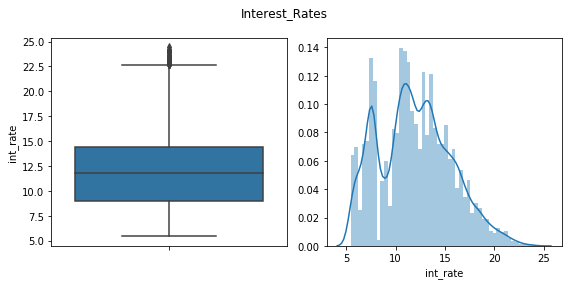

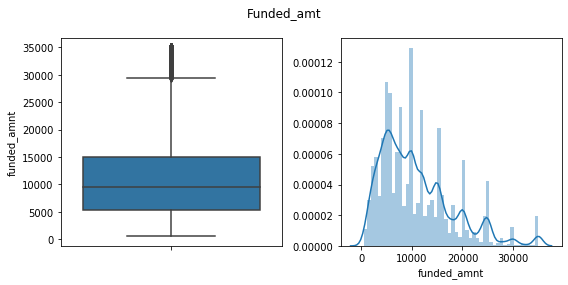

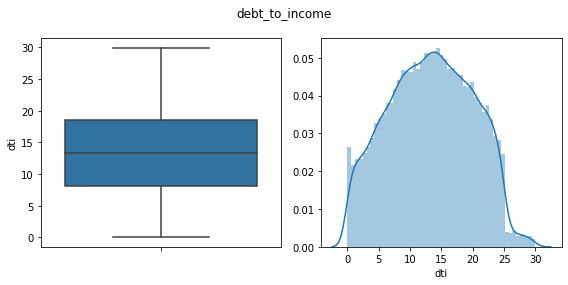

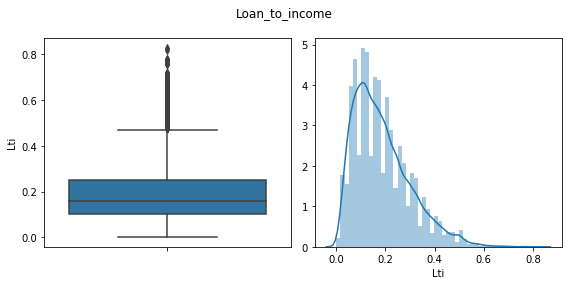

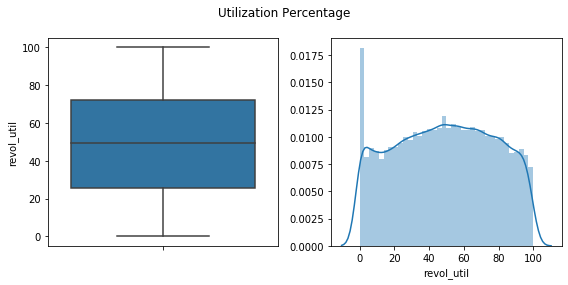

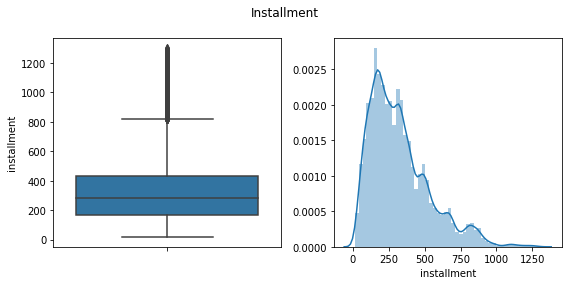

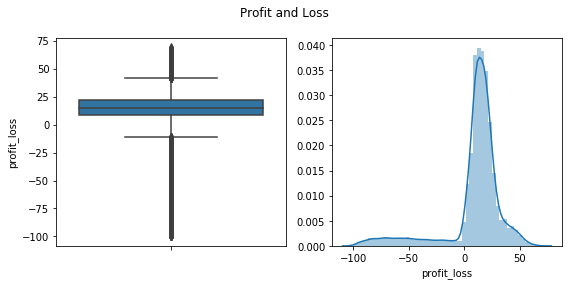

In [35]:
univ_cont(df.int_rate,"Interest_Rates")
univ_cont(df.funded_amnt,"Funded_amt")
univ_cont(df.dti,"debt_to_income")
univ_cont(df.Lti,"Loan_to_income")
univ_cont(df.revol_util,"Utilization Percentage")
univ_cont(df.installment,"Installment")
univ_cont(df.profit_loss,"Profit and Loss")

In [36]:
cols = ["int_rate","funded_amnt","Lti","installment","profit_loss","revol_util","dti"]
for i in cols:
    print("Description for column: ",i)
    print(df[i].describe())
    print()
    print("----------------------------------------")


Description for column:  int_rate
count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

----------------------------------------
Description for column:  funded_amnt
count    37544.000000
mean     10853.560489
std       7096.316776
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

----------------------------------------
Description for column:  Lti
count    37544.000000
mean         0.185082
std          0.114630
min          0.000000
25%          0.100000
50%          0.160000
75%          0.250000
max          0.830000
Name: Lti, dtype: float64

----------------------------------------
Description for column:  installment
count    37544.000000
mean       324.650164
std        208.901055
min         15.690000
25%        167.370000
50%     

In [37]:
#we see a lot of outliers are present above 50%

#sns.countplot(x=df[df.Lti>0.5]['loan_status'],data=df)
#sns.countplot(x=df['loan_status'],data=df)

#sns.countplot(x=df.loan_status,data=df)


## Inferences :
- Majority of loans have a interest rate of 11.83 with little skewness in data
- Funded amount is left skewed with majority of amount at 9600
- Loan to income ratio is left skewed where majority of people have 16% loans in comparison to their annual income
- Utilisation percentage of revolving amount mostly ranges from 25% to 72%. Most of the people have utilised 49% of it.
- installment is left skewed where most of the loans have Rs 280 as installments.
- Overall there is an average profit of 9.51 with loss upto 100 and profit upto 68
- dti has no outliers & varies from 0 to 30 with median 13.38

There are no outliers present for dti we will group this data too into high,medium & low.

As per the reports lower the dti, higher the chances of getting the loan accepted. Lenders expect the dti should be atleast less than 35% which is true for all conditions here.

#### Type driven derived metrics

after infering from univariate analysis on continuous data we can use the following for further analysis

In [38]:
#function to categorize dti
def categorize_dti(a):
    if a>0.0 and a<=10.0:
        return "Low(0-10)"
    elif a>10.0 and a<=20.0:
        return "Medium(10-20)"
    else:
        return "High(20+)"
    

Creating another feature dti_class like int_rate_class to further use it for analysing defaulters behaviour

In [39]:
df['dti_class']=df.dti.apply(lambda x: categorize_dti(x))

Creating Lti_class for further analysis

In [40]:
#function to categorize lti
def categorize_lti(a):
    if a>0.0 and a<=0.1:
        return "Low(0-10)"
    elif a>0.10 and a<=0.20:
        return "Medium(10-20)"
    else:
        return "High(20+)"
    

In [41]:
df['Lti_class']=df.Lti.apply(lambda x: categorize_lti(x))

Creating exp_class for further analysis

In [42]:
#function to categorize experiences
def categorize_exp(a):
    if a>0 and a<=3:
        return "Junior"
    elif a>3 and a<=6:
        return "Mid Senior"
    else:
        return "Senior"
    

In [43]:
df['exp_class']=df.emp_length.apply(lambda x: categorize_exp(x))

As per domain knowledge revol_util should be atleast < 30%. Based on data avaiable lets create revol_class 

In [44]:
#function to categorize revol_util
def categorize_revol(a):
    if a>0.0 and a<=10.0:
        return "Low(0-10)"
    elif a>10.0 and a<=20.0:
        return "Medium(10-20)"
    else:
        return "High(20+)"
    

In [45]:
df['revol_class']=df.revol_util.apply(lambda x: categorize_revol(x))

### Categorical Features

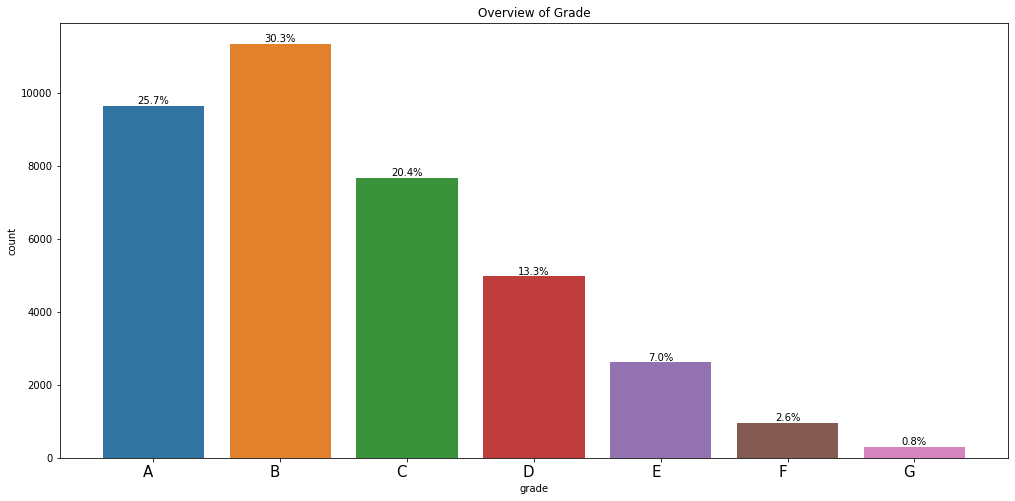

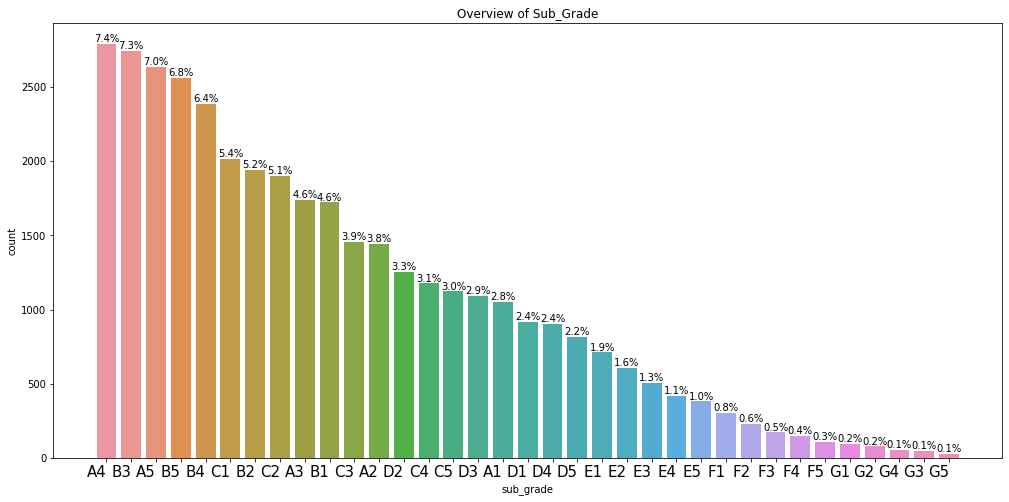

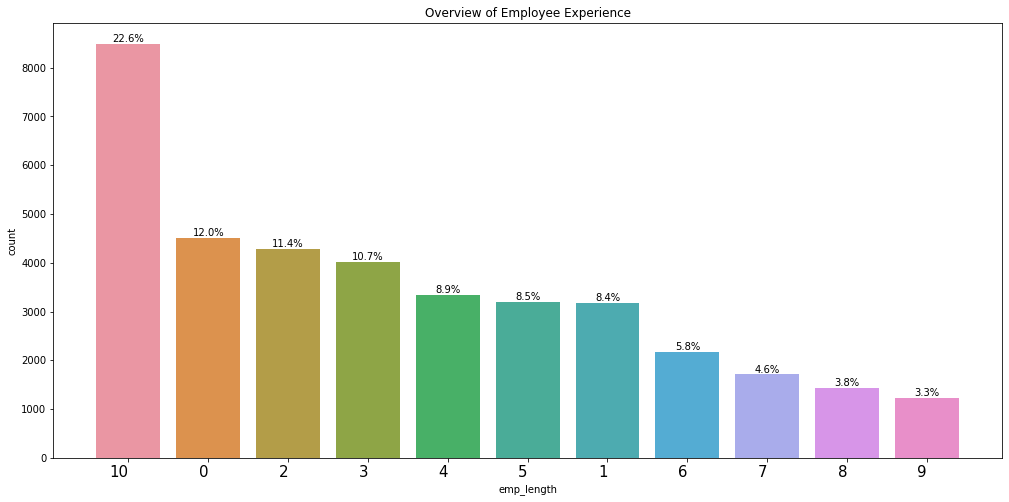

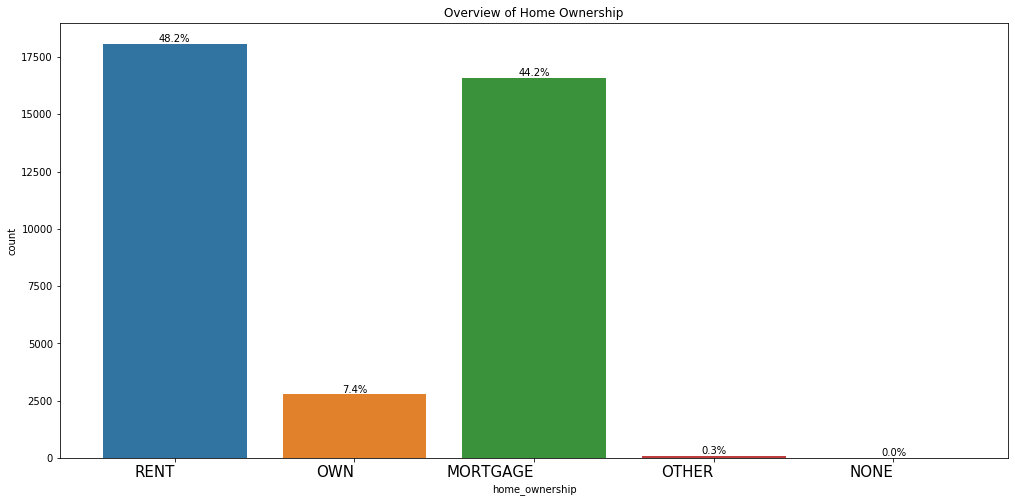

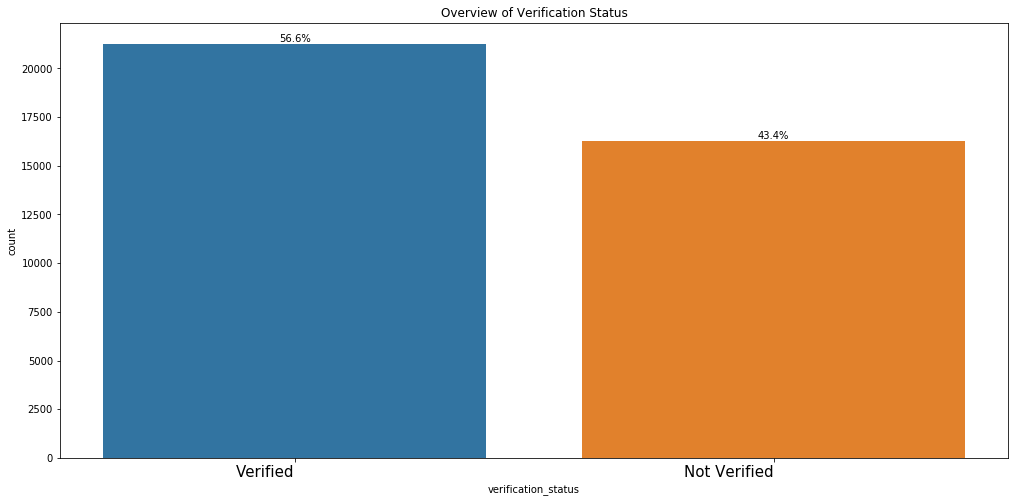

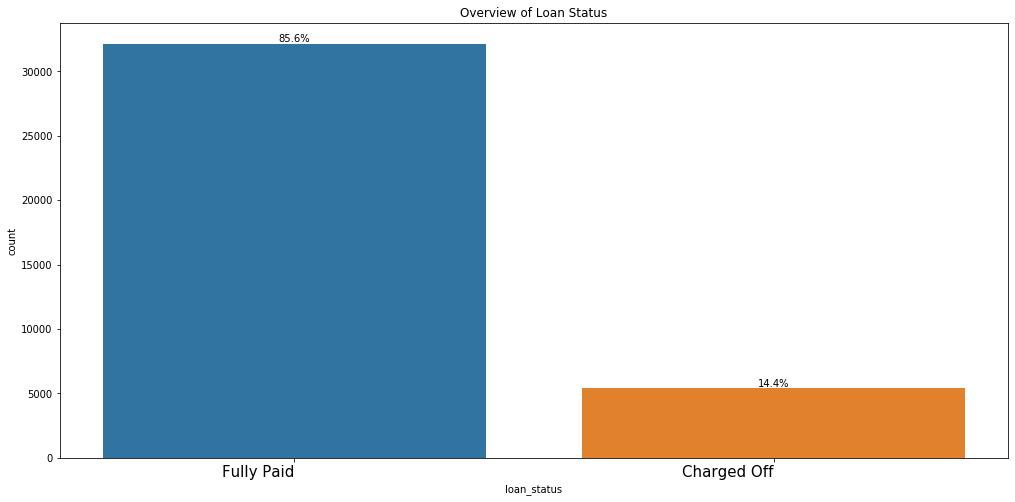

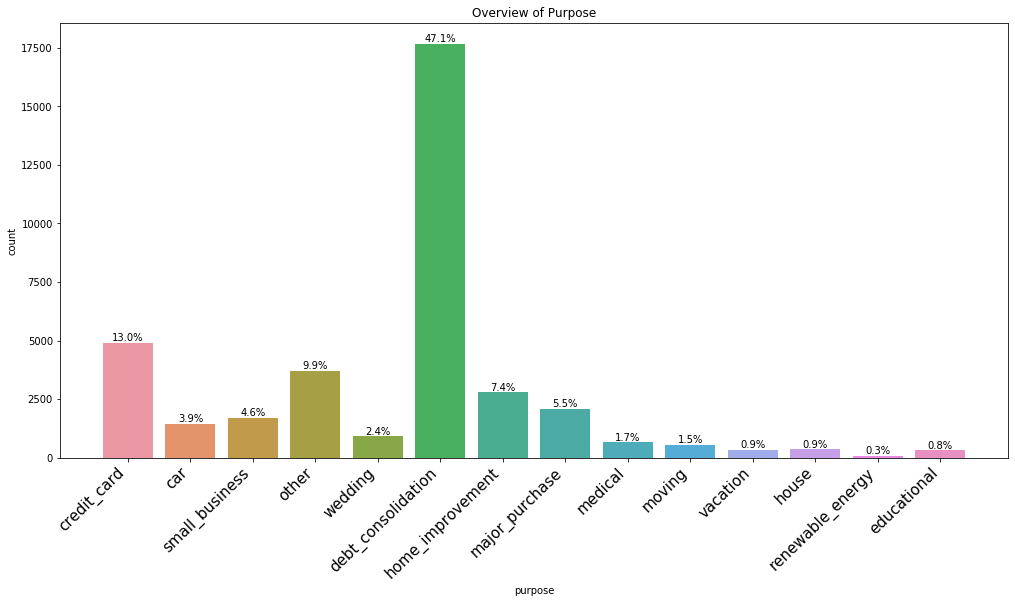

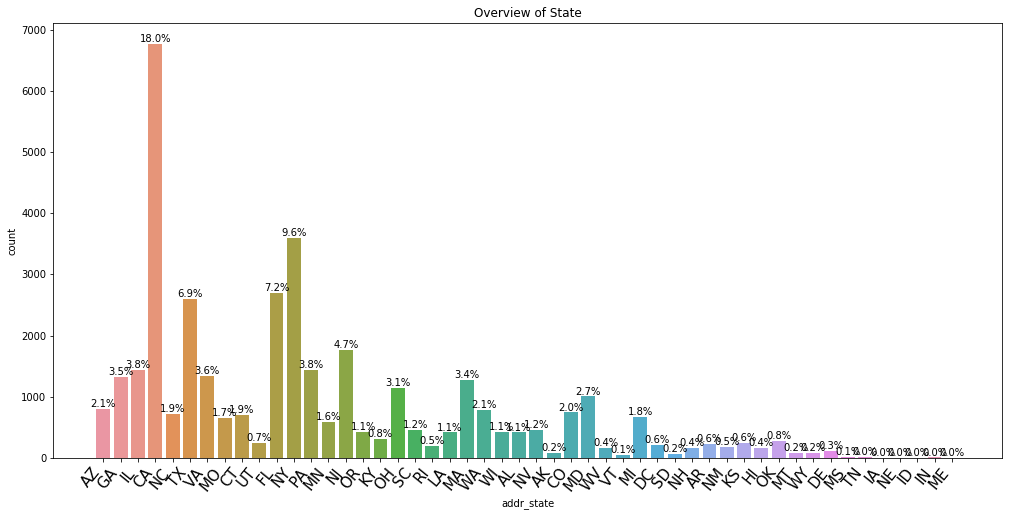

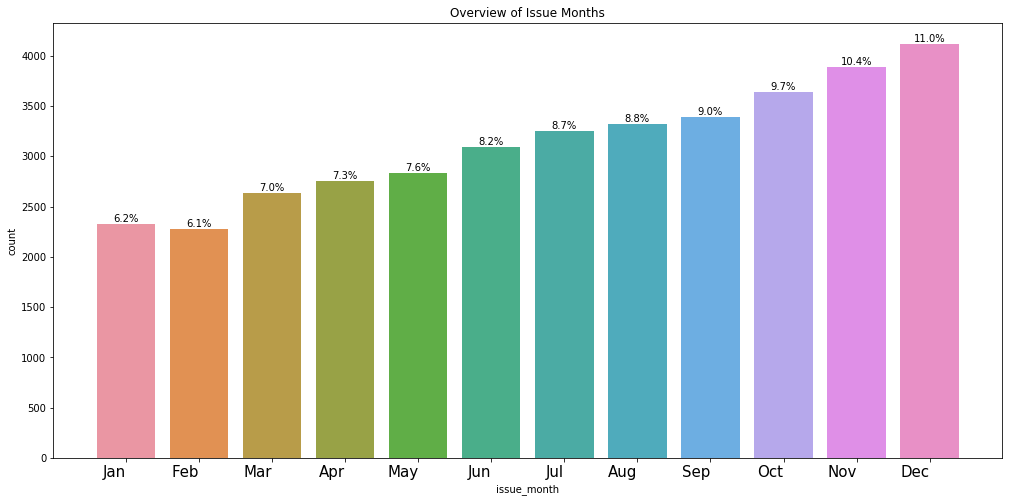

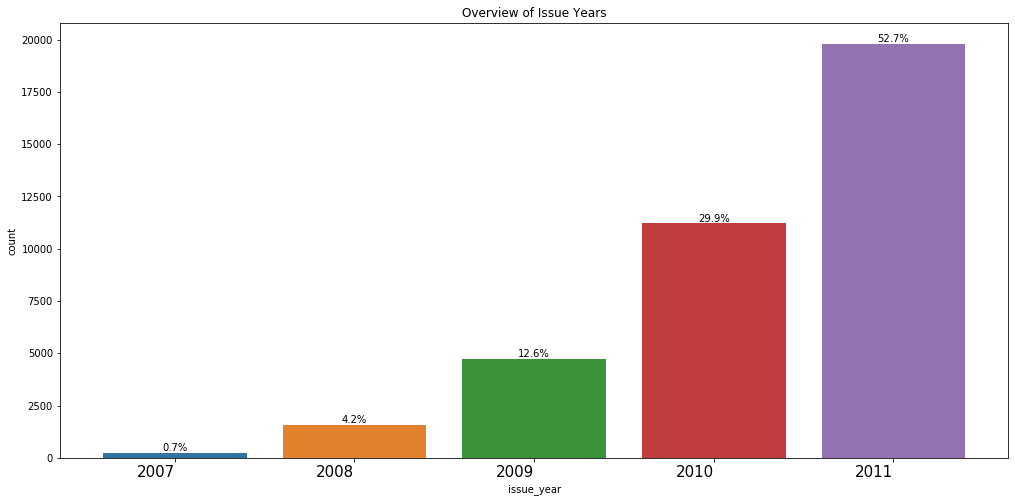

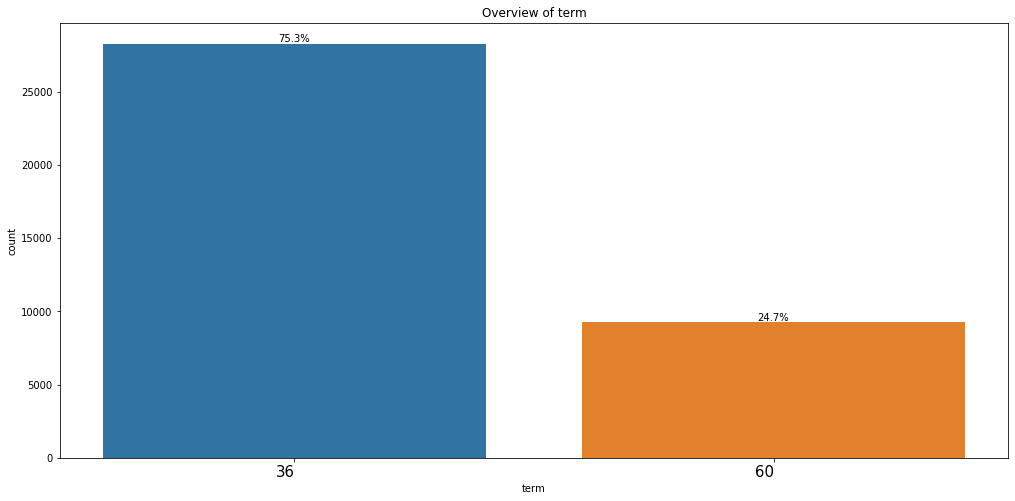

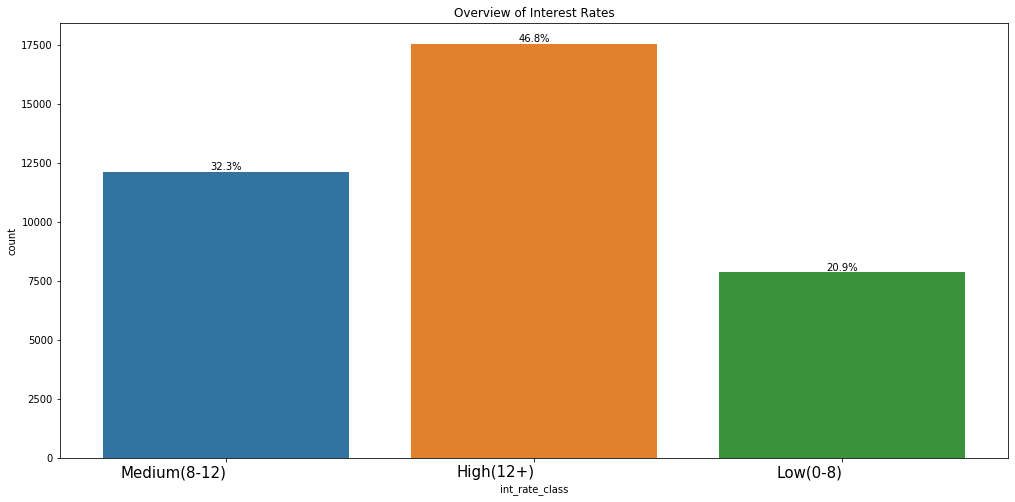

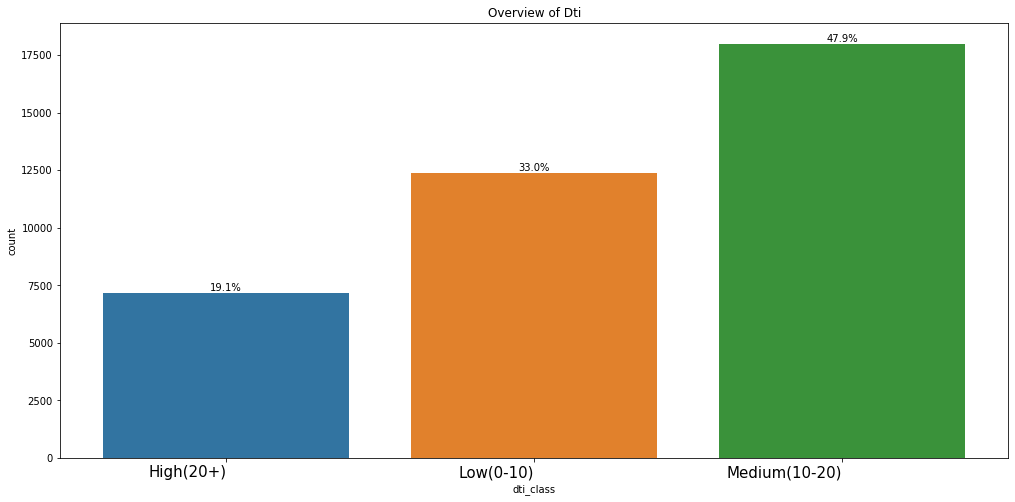

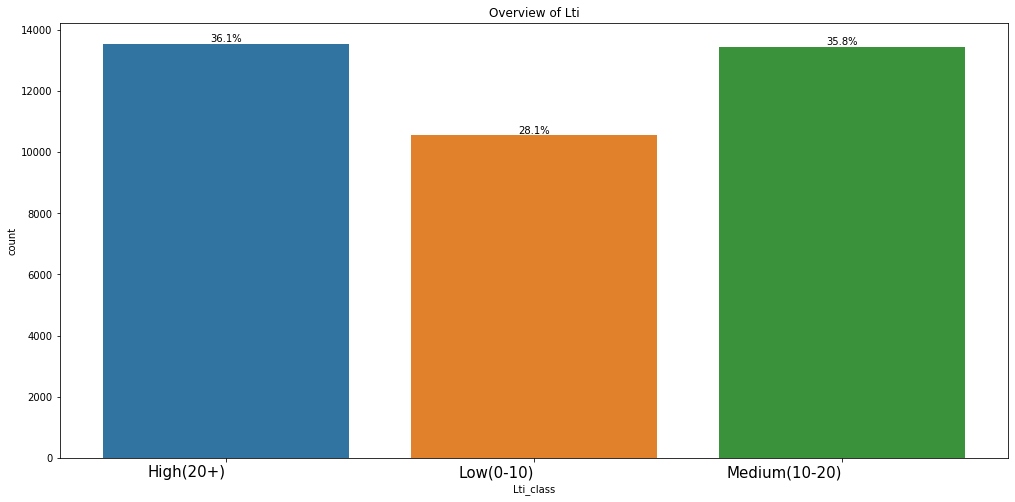

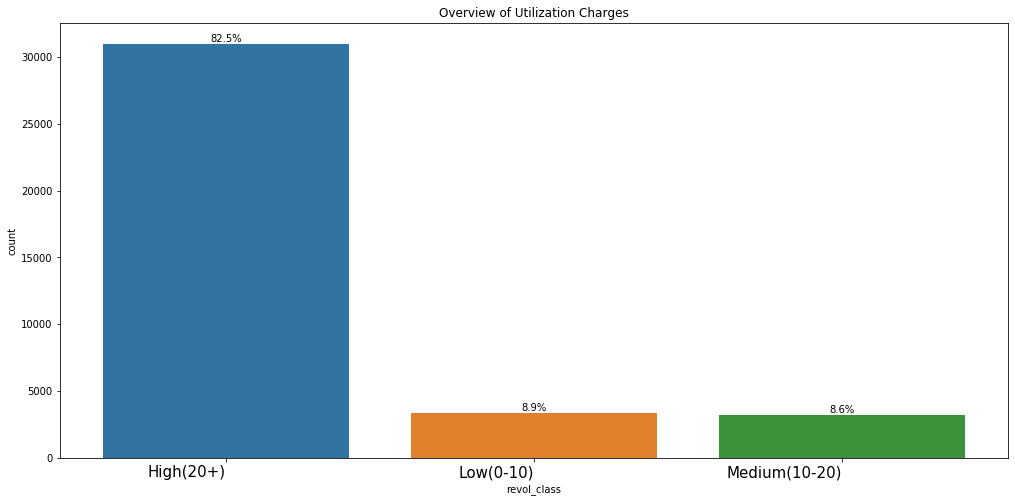

In [62]:
countplot(df.grade,"Overview of Grade",None,["A","B","C","D","E","F","G"],0,df)
countplot(df.sub_grade,"Overview of Sub_Grade",None,df.sub_grade.value_counts().index,0,df)
countplot(df.emp_length,"Overview of Employee Experience",None,df.emp_length.value_counts().index,0,df)
countplot(df.home_ownership,"Overview of Home Ownership",None,None,0,df)
countplot(df.verification_status,"Overview of Verification Status",None,None,0,df)
countplot(df.loan_status,"Overview of Loan Status",None,None,0,df)
countplot(df.purpose,"Overview of Purpose",None,None,44,df)
countplot(df.addr_state,"Overview of State",None,None,51,df)
countplot(df.issue_month,"Overview of Issue Months",None,["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep", "Oct","Nov","Dec"],0,df)
countplot(df.issue_year,"Overview of Issue Years",None,None,0,df)
countplot(df.term,"Overview of term",None,None,0,df)
countplot(df.int_rate_class,"Overview of Interest Rates",None,None,0,df)
countplot(df.dti_class,"Overview of Dti",None,None,0,df)
countplot(df.Lti_class,"Overview of Lti",None,None,0,df)
countplot(df.revol_class,"Overview of Utilization Charges",None,None,0,df)



### Inferences from above plots:
- grade - the popular grades of loan is A,B & C while B being highest (30.3%)
- sub_grade - after ordering the data it is seen how popularity is distributed for eg B>A as per grades even after A4 (7.4%) is highest because if we see B1-B5 & A1-A5; B has higher values
- emp_length - the experience is one of the factor to determine loan applicant we see 10 years & more have taken the highest loans (22.6%) & next if we leave out the 1 year experience one we see decreasing trend of taking loans with increasing experience
- home_ownership - Rent & Mortgage  are most occuring
- verification status - the ratio is nearly equal, need to check impact on loan_status
- loan_status - 14.4% are the defaulters
- purpose - debt_consolidation(47.1%) accounts for most of the loans and is mostly paid
- addr_state - it shows highest loan taking states CA,NY,FL & TX; CA being the top with 18%
- issue_month - shows the trend of taking highest loans in the month of Dec (may be due to their festivals). The trend increases from Jan - Dec approx
- issue_year - the loan sanctions have increased considerably over the years
- term shows most loans are of 36 months
- interest rate is on higher side
- most people has dti in medium scale
- lti is nearly same for both the class high & medium
- utilization charge is mainly high for max cases

## Segmented Univariate Analysis

Previously, we segmented the columns as per business understanding. Picking up the customer behaviour features to check if it actually helps to identify defaulters

In [47]:
#replacing revol_util with revol_class
df_bhvr=np.asarray(df_bhvr)
df_bhvr[df_bhvr=='revol_util']='revol_class'


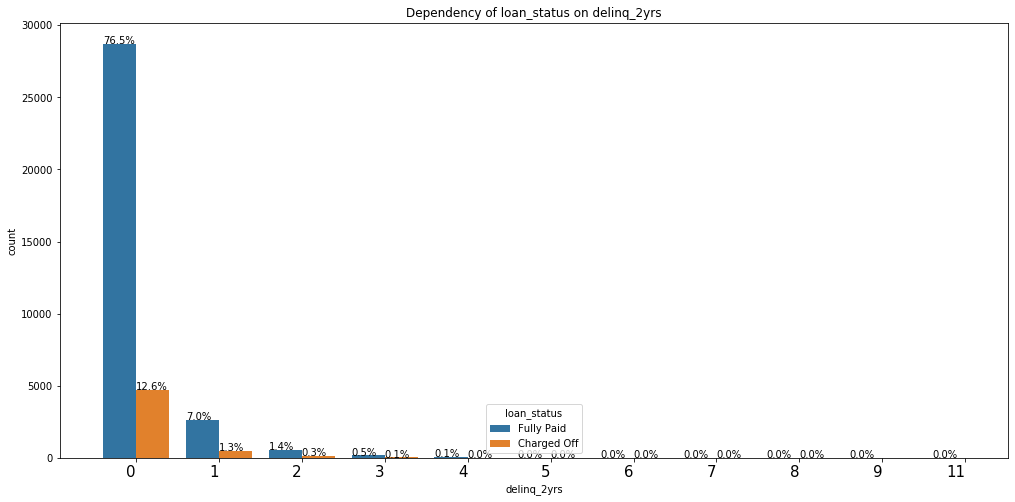

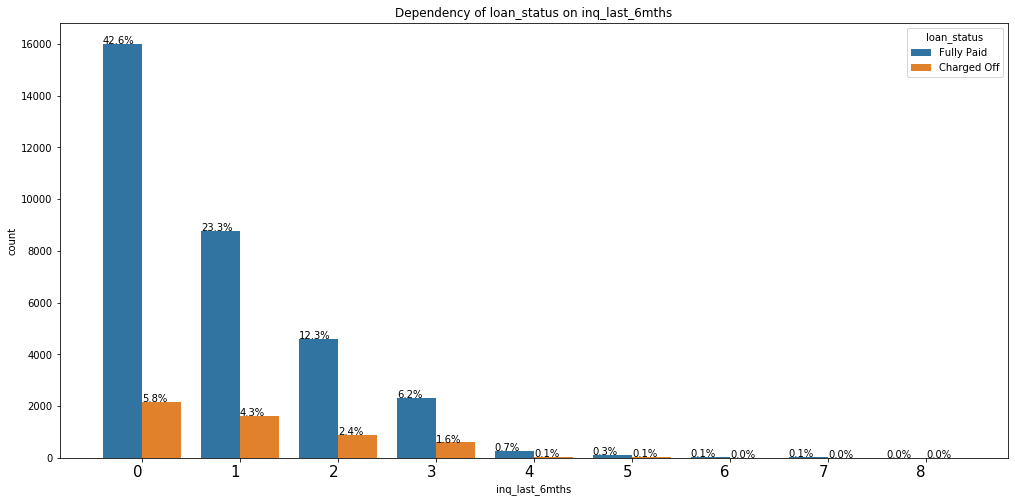

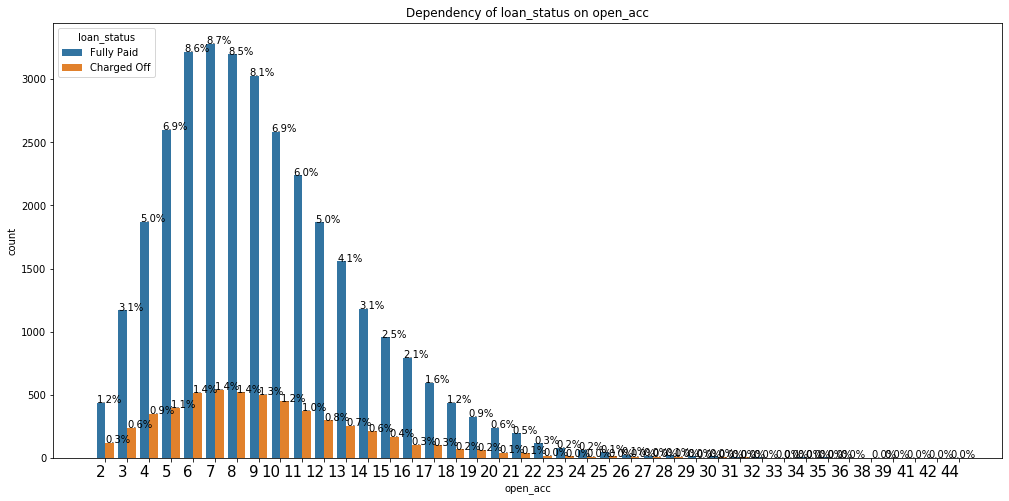

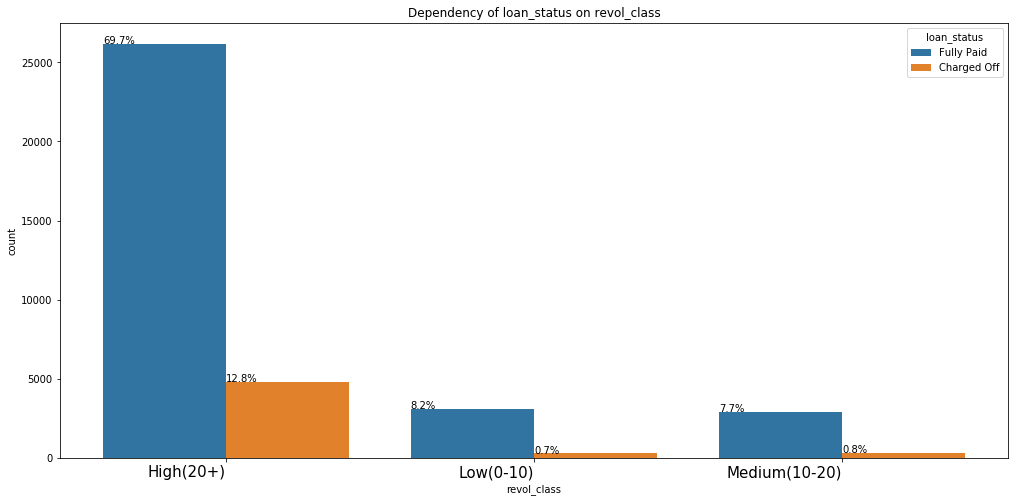

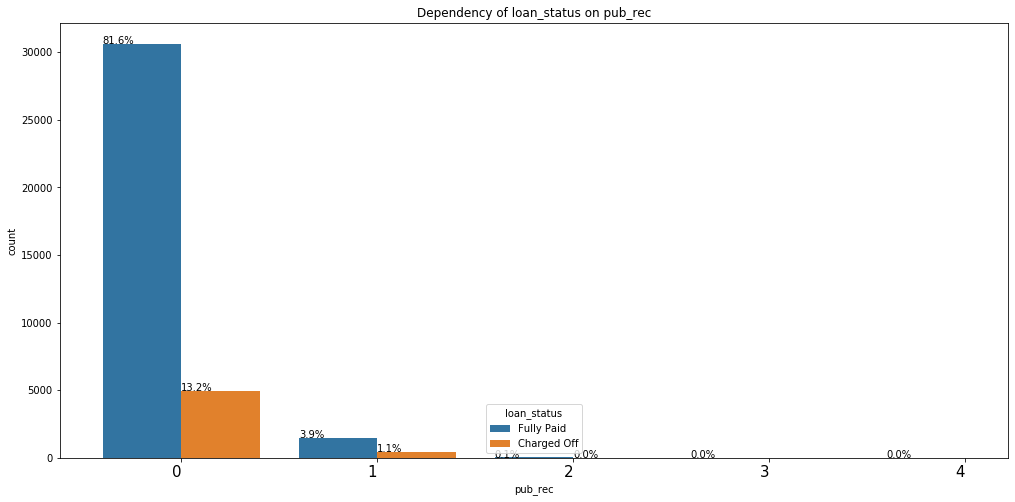

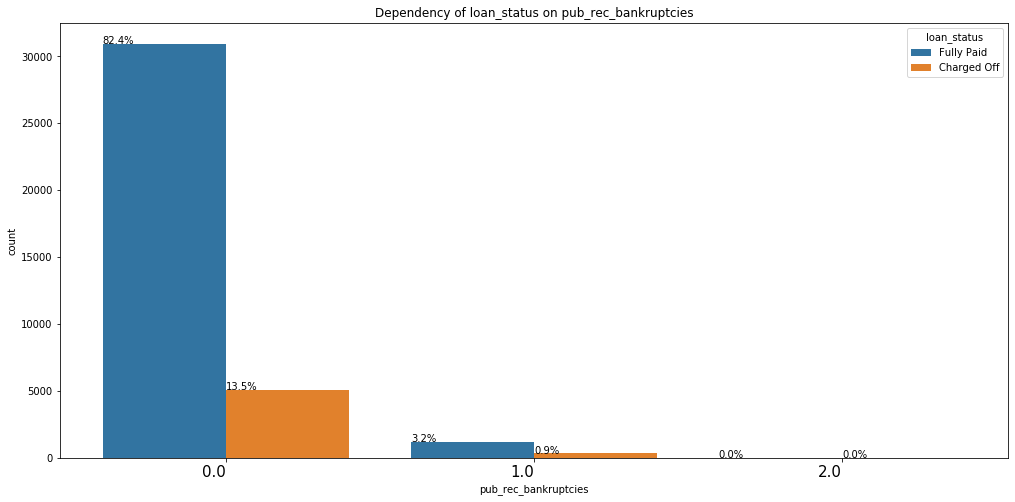

In [48]:
#sns.countplot(x=df.issue_year,hue=df.loan_status,data=df)
for i in df_bhvr :
    countplot(df[i],"Dependency of loan_status on "+i,df.loan_status,None,0,df)

## Inferences 
- delinq_2yrs has impact on loan status if compare ratios of fully paid to charged off it is more for 0 & eventually decreases i.e. is more defaulter cases
- persons who have inquired in past 6 months the ratio of paid to defaulter decreases with number
- leaving 5-10 open accounts the ratio of paid to defaulters is more 
- having public record also shows decreased ratio
- having high utilization rate is showing increased defaulters 
- having bankruptcy record also shows similar trend of decreased ratio

Here ratio means Fully Paid to Defaulters since there gap is decreasing their ratio is too which signifiesmore defaulters

#### Thus issuing loans to such customers should be considered risky

data based on other two segments loan details & customer information

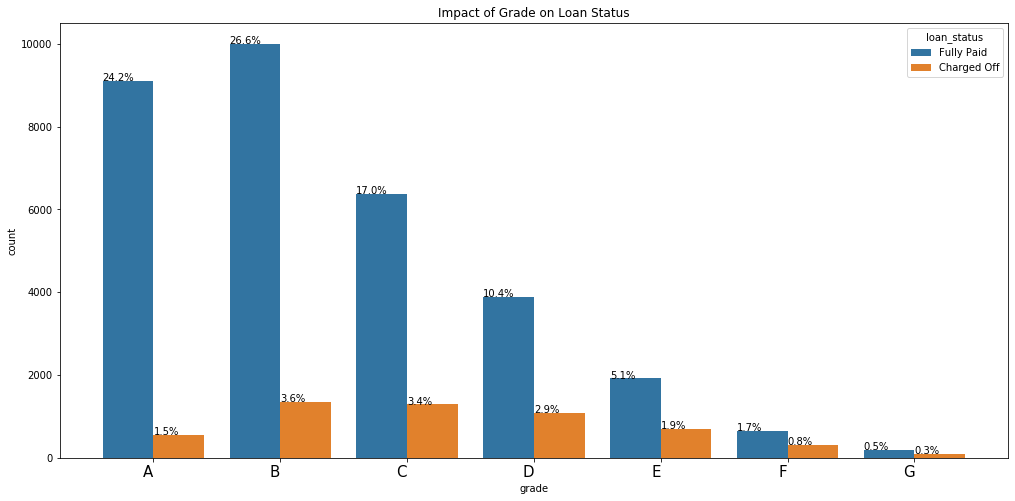

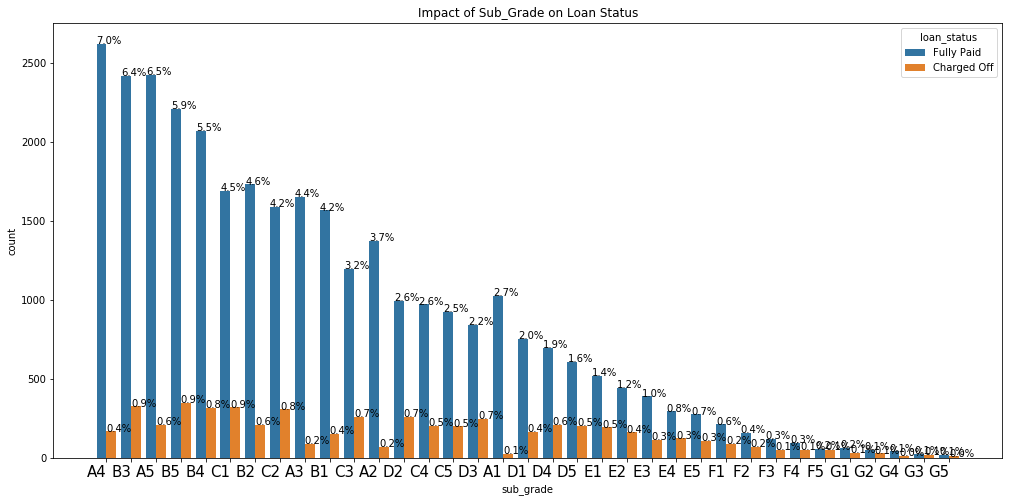

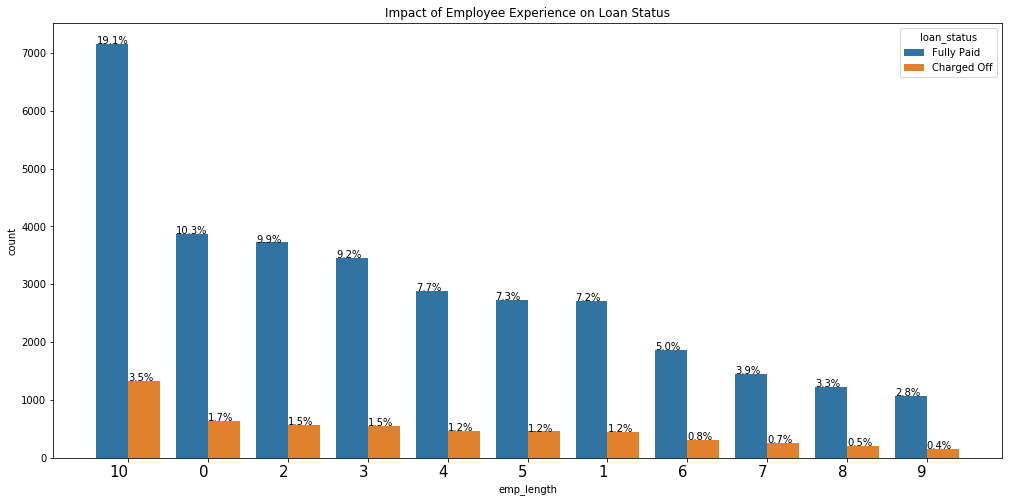

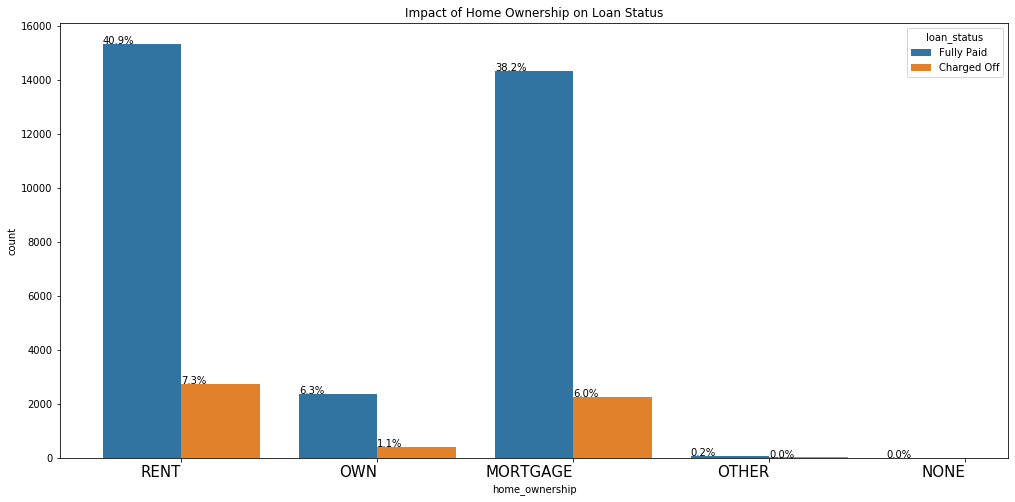

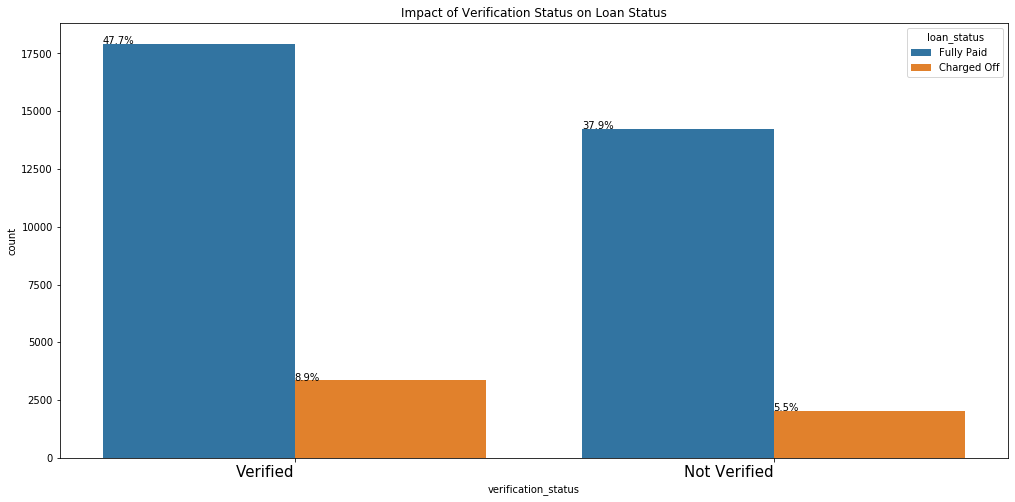

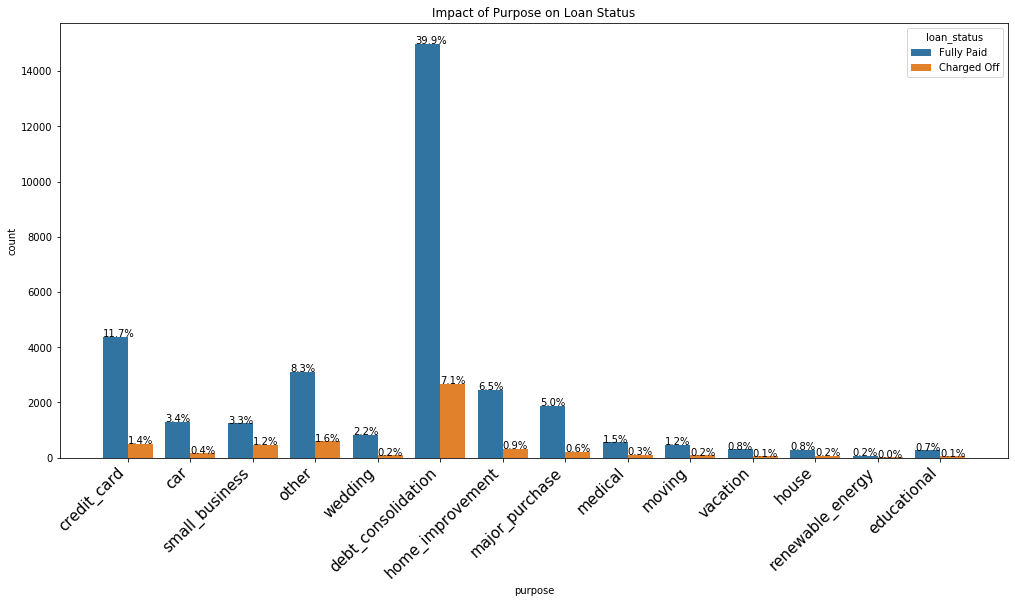

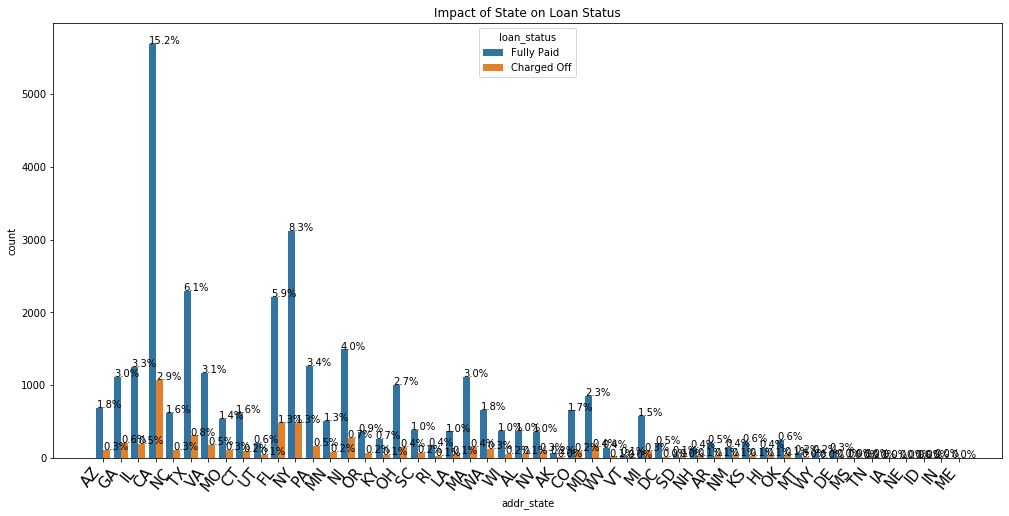

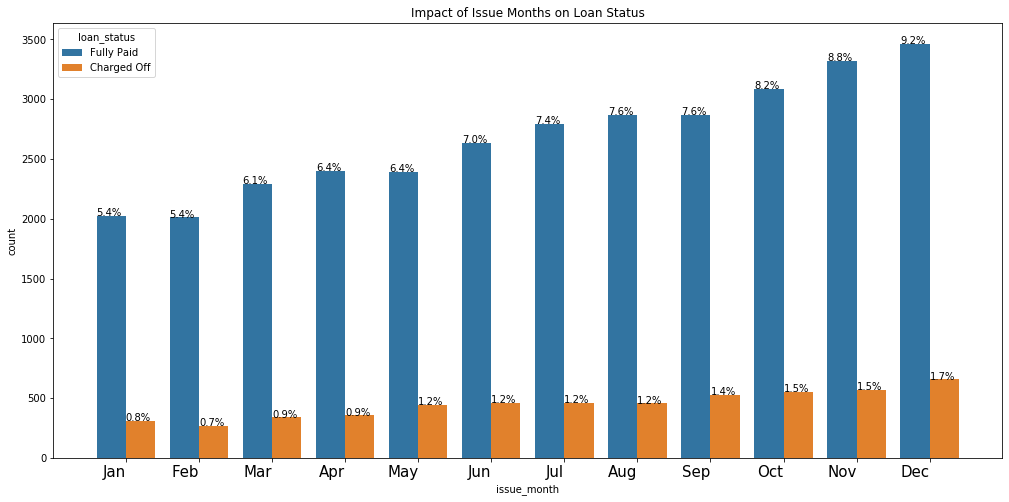

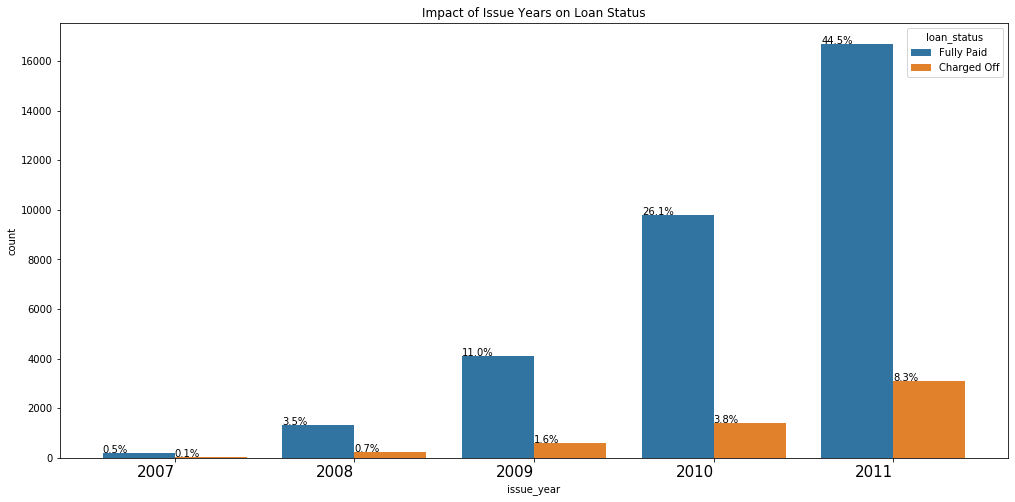

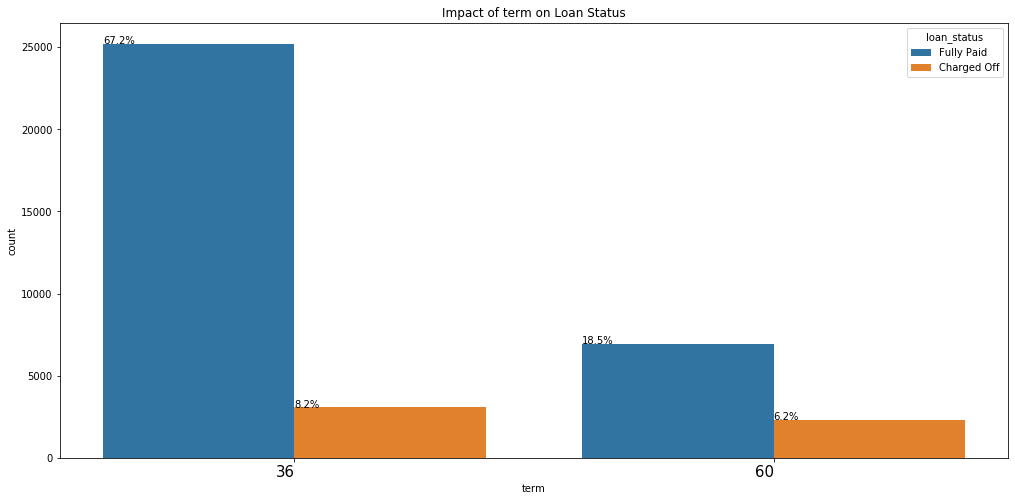

In [49]:
countplot(df.grade,"Impact of Grade on Loan Status","loan_status",["A","B","C","D","E","F","G"],0,df)
countplot(df.sub_grade,"Impact of Sub_Grade on Loan Status","loan_status",df.sub_grade.value_counts().index,0,df)
countplot(df.emp_length,"Impact of Employee Experience on Loan Status","loan_status",df.emp_length.value_counts().index,0,df)
countplot(df.home_ownership,"Impact of Home Ownership on Loan Status","loan_status",None,0,df)
countplot(df.verification_status,"Impact of Verification Status on Loan Status","loan_status",None,0,df)
countplot(df.purpose,"Impact of Purpose on Loan Status","loan_status",None,44,df)
countplot(df.addr_state,"Impact of State on Loan Status","loan_status",None,51,df)
countplot(df.issue_month,"Impact of Issue Months on Loan Status","loan_status",["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep", "Oct","Nov","Dec"],0,df)
countplot(df.issue_year,"Impact of Issue Years on Loan Status","loan_status",None,0,df)
countplot(df.term,"Impact of term on Loan Status","loan_status",None,0,df)

#### Inferences:
- The proportion of fully paid to charged off is less for grade A loans whereas it decreases moving towards grade G. So it can be inferred grade G loans have more chance of defaulting. Similar case is for sub grades as well.
- Employees with 10+ years of experience are taking more loans and number of defaulter is also more here. But for the employee experience (0-9), we can observe that employee experience have inverse effect on loan status. The less years of experience is taking more number of loans and is resulting to more defaulters. So emp_length is one of the driving factor for loan status.
- Persons with rented homes are taking most of the loans.
- debt_consolidation(47.1%) accounts for most of the loans and is mostly paid but also accounts to defaulters(7.1%)
- Number of borrower from CA is most and it also has the highest number of defaulter.
- Number of fully paid as well as charged off loans are increasing yearly and it is maximum during december month.
- The proportion of fully paid to charged off loan is most for 60 months loans compared to 36 months loan. Term can be a driving factor to identify defaulters

## Bivariate Analysis

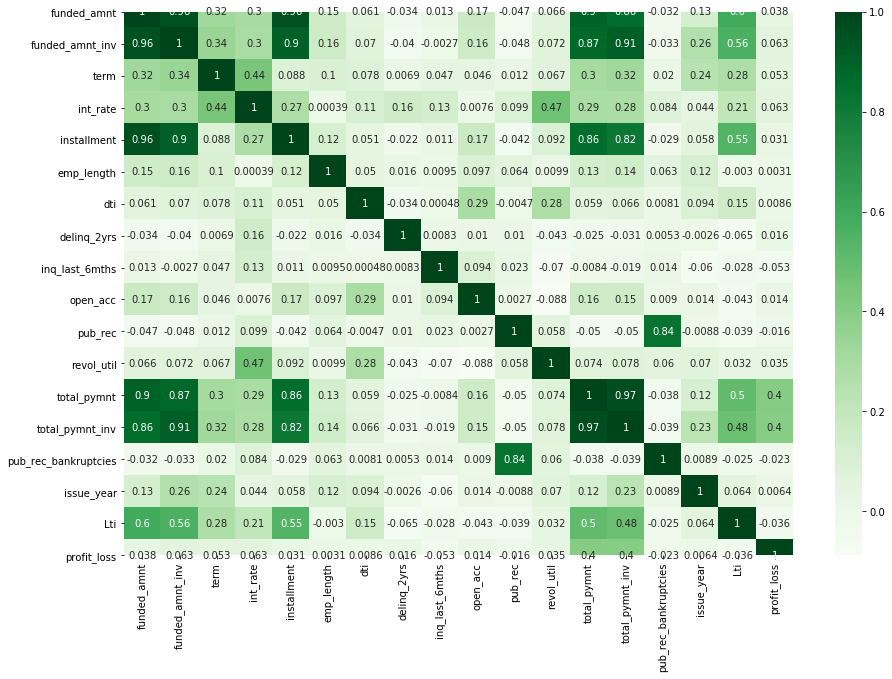

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Greens', annot=True)
#plt.ylim(bottom=10,top=10)
plt.show()

#### Inferences:
- We can see a correlation of dti and open_acc. Means as many number of open accounts are there in a borrrower credits file, the dti would go on increasing.
- open_acc is also correlated to total payment. 
- Funded amount and amount invested has a high correlation indicating that more amount funded needs more investment.
- Number of instalments have a strong correlation to total payment and total investment. As the amount increses, the number of installment also increases. Similar case is for loan term.


In [51]:
#function for scatterplot
def scatterplot(title,x,y,hue,style):
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, style=style)
    plt.savefig(title+".png")
    plt.title(title)
    plt.plot()

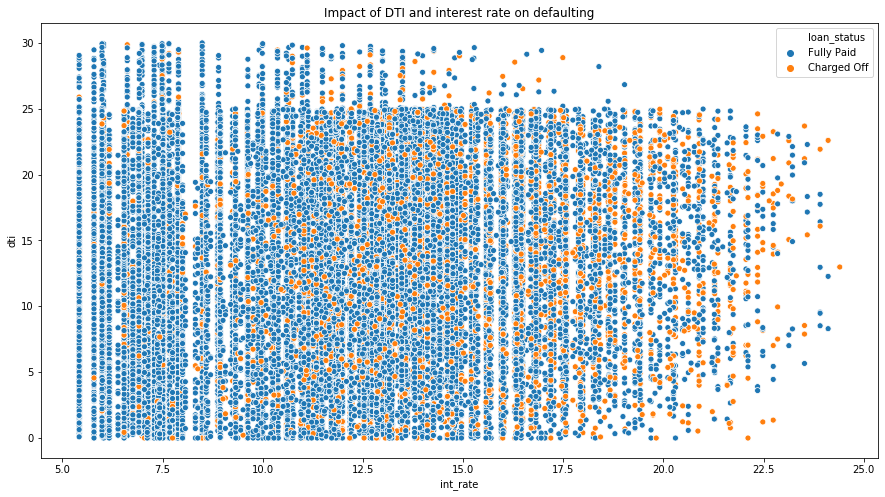

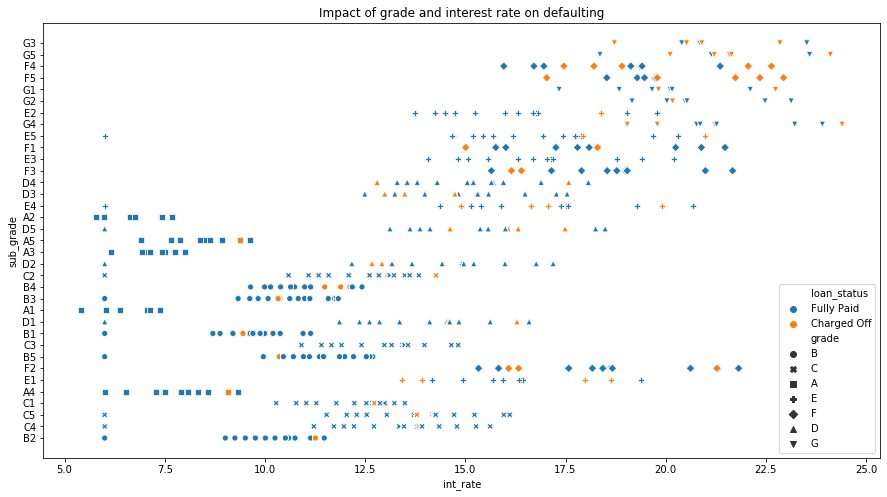

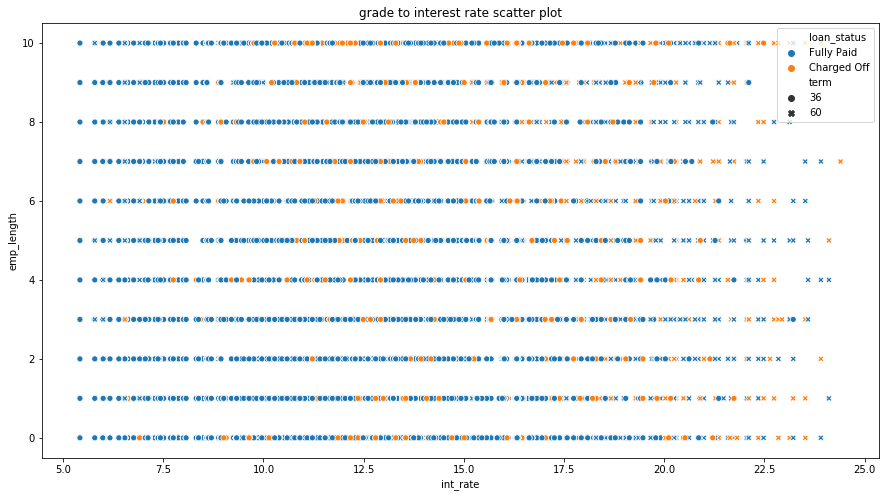

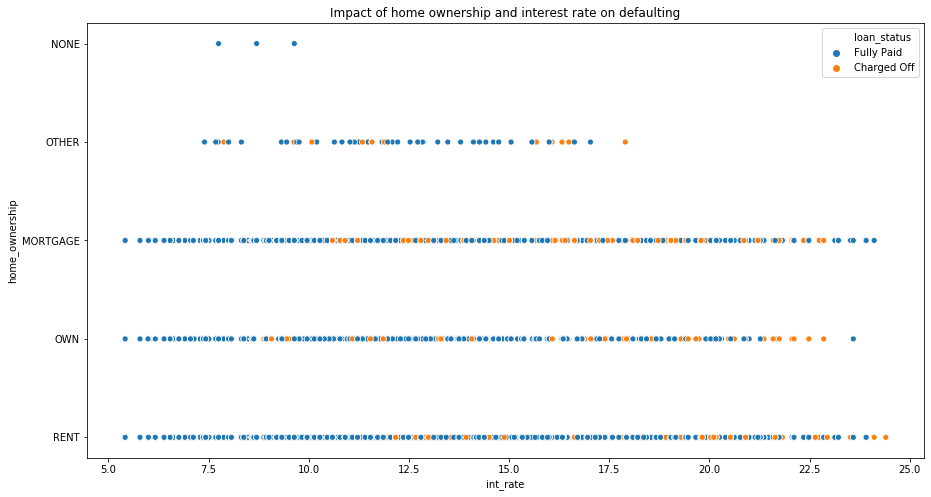

In [52]:
scatterplot("Impact of DTI and interest rate on defaulting","int_rate","dti",'loan_status',None)
scatterplot("Impact of grade and interest rate on defaulting","int_rate","sub_grade","loan_status","grade")
scatterplot("grade to interest rate scatter plot","int_rate","emp_length","loan_status","term")
scatterplot("Impact of home ownership and interest rate on defaulting","int_rate","home_ownership","loan_status",None)



### Inferences
- Increasing rate of interest with dti shows more loan defaulter.
- Lower grade of loan with increasing rate of interest shows higher chances of defaulter.
- Loan with 60 months term shows greater number of defaulter when rate of interest is high.
- 10+ years of employee experience shows more defaulter with higher interest rates.
- Mortgaged and rented home owners shows more number of loan with more defaulters when interest rate is medium to high



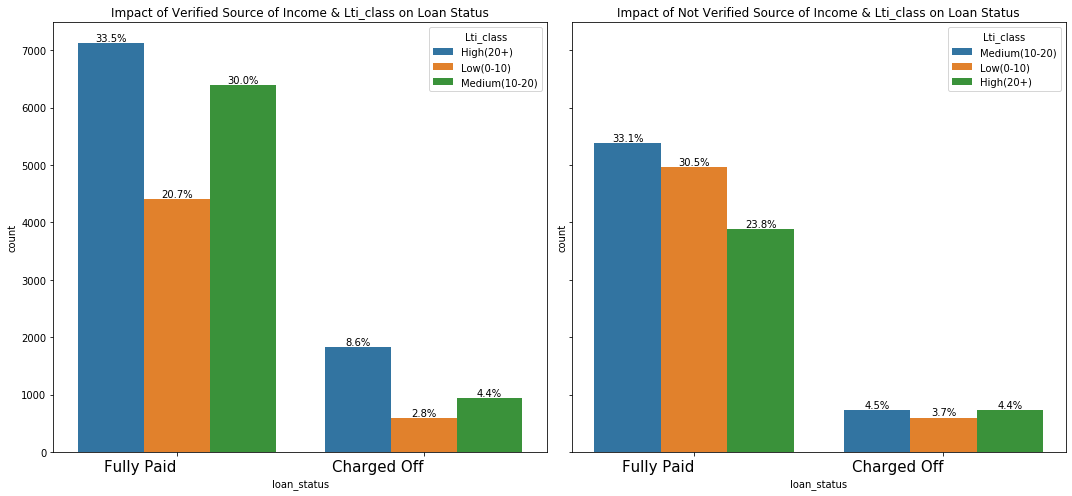

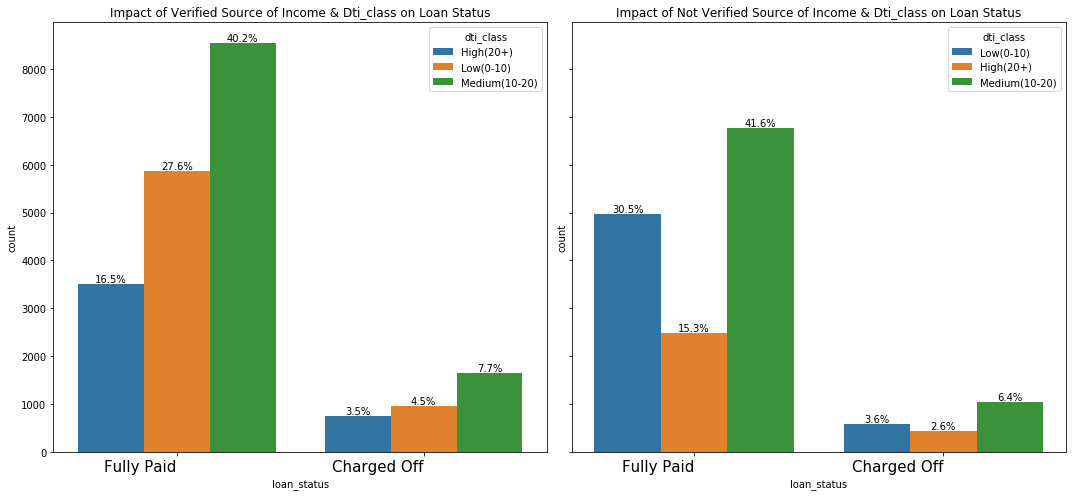

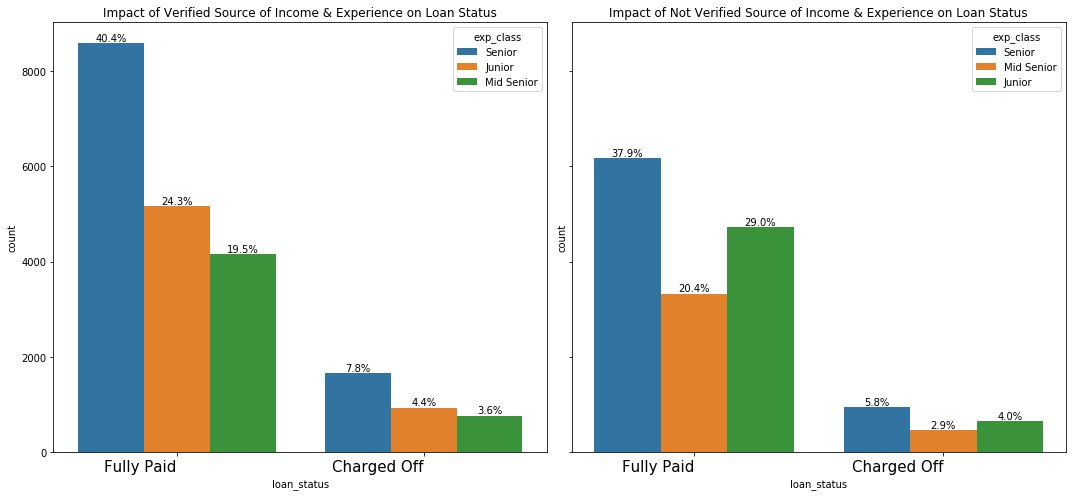

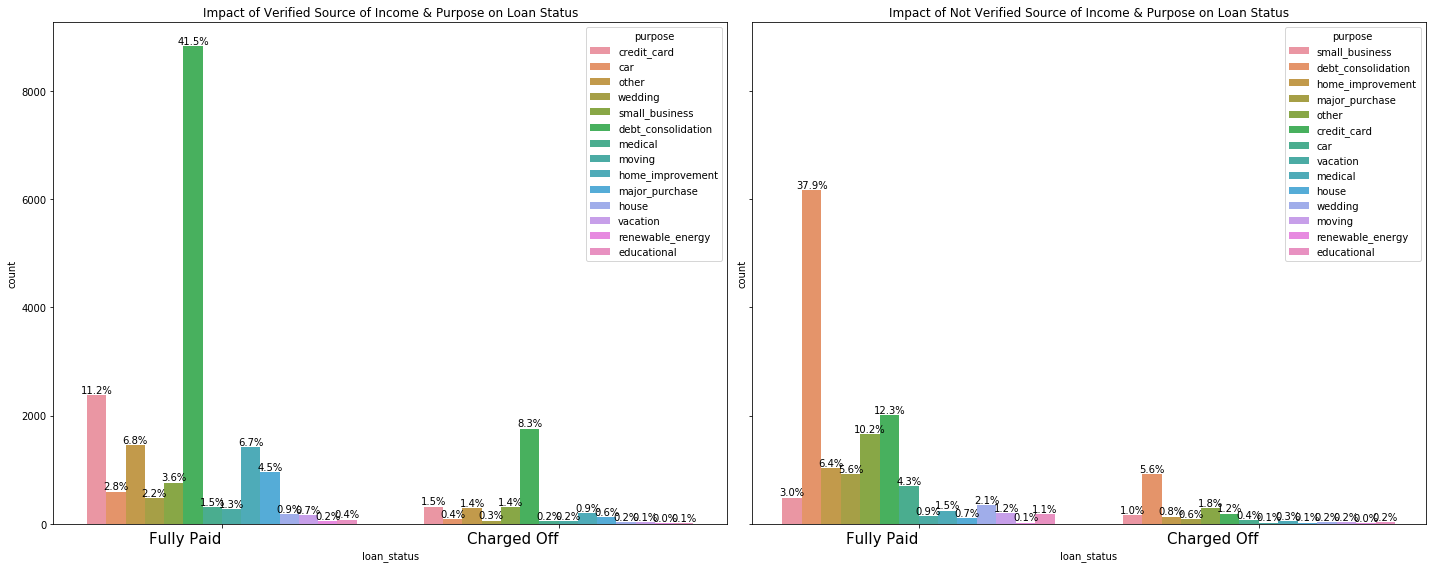

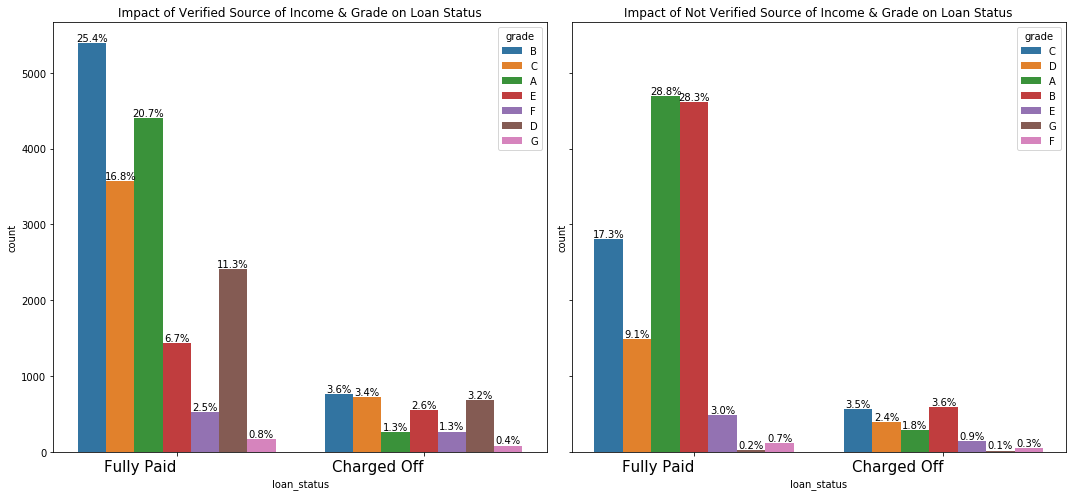

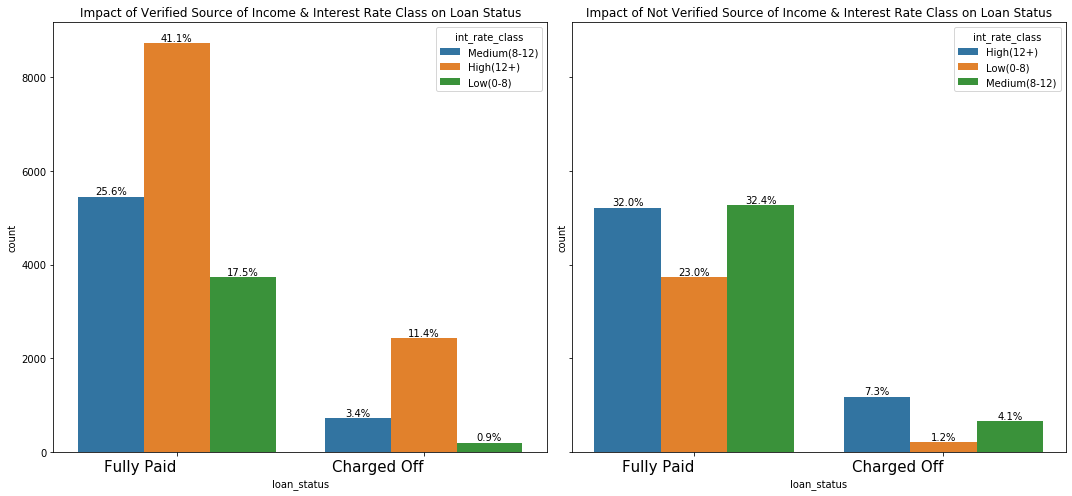

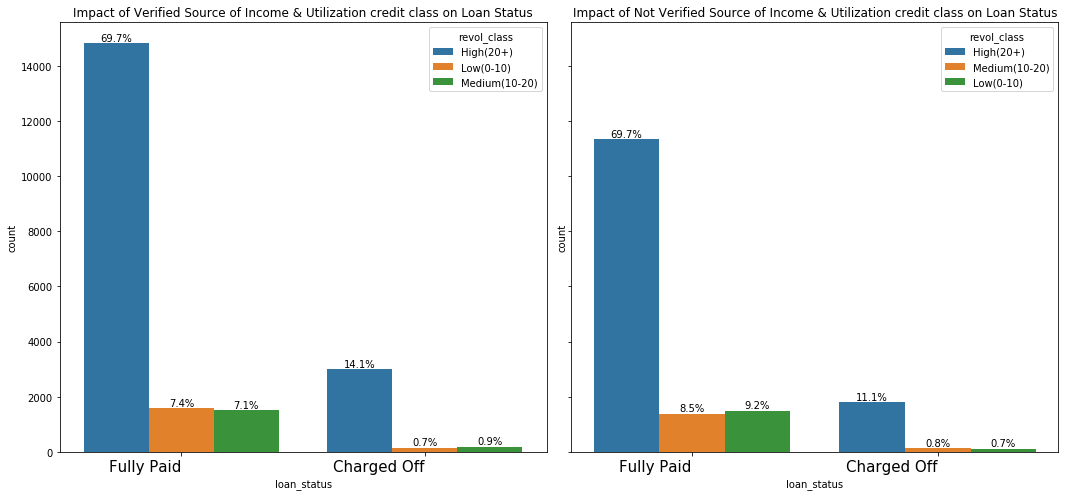

In [59]:
f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.verification_status=='Verified'],"Impact of Verified Source of Income & Lti_class on Loan Status",'Lti_class',0,a1)
cntsubplot('loan_status',df[df.verification_status=='Not Verified'],"Impact of Not Verified Source of Income & Lti_class on Loan Status",'Lti_class',0,a2)

f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.verification_status=='Verified'],"Impact of Verified Source of Income & Dti_class on Loan Status",'dti_class',0,a1)
cntsubplot('loan_status',df[df.verification_status=='Not Verified'],"Impact of Not Verified Source of Income & Dti_class on Loan Status",'dti_class',0,a2)


f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.verification_status=='Verified'],"Impact of Verified Source of Income & Experience on Loan Status",'exp_class',0,a1)
cntsubplot('loan_status',df[df.verification_status=='Not Verified'],"Impact of Not Verified Source of Income & Experience on Loan Status",'exp_class',0,a2)

f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(20,8))
cntsubplot('loan_status',df[df.verification_status=='Verified'],"Impact of Verified Source of Income & Purpose on Loan Status",'purpose',0,a1)
cntsubplot('loan_status',df[df.verification_status=='Not Verified'],"Impact of Not Verified Source of Income & Purpose on Loan Status",'purpose',0,a2)

f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.verification_status=='Verified'],"Impact of Verified Source of Income & Grade on Loan Status",'grade',0,a1)
cntsubplot('loan_status',df[df.verification_status=='Not Verified'],"Impact of Not Verified Source of Income & Grade on Loan Status",'grade',0,a2)

f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.verification_status=='Verified'],"Impact of Verified Source of Income & Interest Rate Class on Loan Status",'int_rate_class',0,a1)
cntsubplot('loan_status',df[df.verification_status=='Not Verified'],"Impact of Not Verified Source of Income & Interest Rate Class on Loan Status",'int_rate_class',0,a2)


f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.verification_status=='Verified'],"Impact of Verified Source of Income & Utilization credit class on Loan Status",'revol_class',0,a1)
cntsubplot('loan_status',df[df.verification_status=='Not Verified'],"Impact of Not Verified Source of Income & Utilization credit class on Loan Status",'revol_class',0,a2)


### Inferences
- Impact of  loan to income ratio is clearly visible if it is on higher side then the default % increases even if it is verified source of income
- Similarly for dti, being in the range of 10%-20% leads to more number of defaulters devoid of verification
- The senior employees(7+ years) are contributing more in the defaulters bucket irrespective of verification status
- the purpose for debt_consolidation attracts more & also results to defaulters too
- higher grades loans are still resulting to defalters
- int_rate & revol util results to increase in defaulters with increase in vale

In [ ]:
f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.home_ownership=='RENT'],"Impact of Rented Home & Experience_class on Loan Status",'exp_class',0,a1)
cntsubplot('loan_status',df[df.home_ownership=='MORTGAGE'],"Impact of Mortgaged Home & Experience_class on Loan Status",'exp_class',0,a2)

f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.home_ownership=='RENT'],"Impact of Rented Home & dti_class on Loan Status",'dti_class',0,a1)
- Impact of  loan to income ratio is clearly visible if it is on higher side then the default % increases even if it is verified source of income
cntsubplot('loan_status',df[df.home_ownership=='MORTGAGE'],"Impact of Mortgaged Home & dti_class on Loan Status",'dti_class',0,a2)

f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.home_ownership=='RENT'],"Impact of Rented Home & Lti_class on Loan Status",'Lti_class',0,a1)
cntsubplot('loan_status',df[df.home_ownership=='MORTGAGE'],"Impact of Mortgaged Home & Lti_class on Loan Status",'Lti_class',0,a2)

f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.home_ownership=='RENT'],"Impact of Rented Home & term on Loan Status",'term',0,a1)
cntsubplot('loan_status',df[df.home_ownership=='MORTGAGE'],"Impact of Mortgaged Home & term on Loan Status",'term',0,a2)

f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.home_ownership=='RENT'],"Impact of Rented Home & revol_class on Loan Status",'revol_class',0,a1)
cntsubplot('loan_status',df[df.home_ownership=='MORTGAGE'],"Impact of Mortgaged Home & revol_class on Loan Status",'revol_class',0,a2)


f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.home_ownership=='RENT'],"Impact of Rented Home & int_rate_class on Loan Status",'int_rate_class',0,a1)
cntsubplot('loan_status',df[df.home_ownership=='MORTGAGE'],"Impact of Mortgaged Home & int_rate_class on Loan Status",'int_rate_class',0,a2)


f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.home_ownership=='RENT'],"Impact of Rented Home & purpose on Loan Status",'purpose',0,a1)
cntsubplot('loan_status',df[df.home_ownership=='MORTGAGE'],"Impact of Mortgaged Home & purpose on Loan Status",'purpose',0,a2)


f,(a1,a2)=plt.subplots(1,2,sharey=True,figsize=(15,7))
cntsubplot('loan_status',df[df.home_ownership=='RENT'],"Impact of Rented Home & grade on Loan Status",'grade',0,a1)
cntsubplot('loan_status',df[df.home_ownership=='MORTGAGE'],"Impact of Mortgaged Home & grade on Loan Status",'grade',0,a2)






### Inference

- seniors accounts for more defaults but juniors with rented house also accounts to more default than mortgaged
- having medium dti results in more defaulting
- having high loan to income ratio results in defaulting
- term for 30 & 60 months with mortgaged home results in more defaulting but incase of rented 36 months attracts more defaulters
- revol_class & int_rates_class being high results to being charged off
- defaulters in rented home with purpose of debt_consolidation is high
- having high grade loans & rented home results in more getting defaulters



### Conclusions
- The provided data has lot of null and missing values. Columns with more that 60% null have been dropped and null have been enriched wherever applicable
- Few of the columns had malformed data. Those were standardized.
- Busines driven, data driven and type driven derived columns are created as required.
- After data understanding and cleanup, univariate and bivariate analysis have been done.
- Few of the strong inferences deduced are as follows:
<br>

    - Increasing rate of interest shows more loan defaulter. Loans with greater interest might be a risk.
    - pub_rec,pub_rec_bankruptcies & delinq_2yrs are showing higher defaulter rates
    - Number of borrower from CA is most and it also has the highest number of defaulter. Borrower from state CA needs to be scrutunized properly.
    - Lower grade of loan with increasing rate of interest shows higher chances of defaulter.
    - Loan with 60 months term shows greater number of defaulter when rate of interest is high.
    - Mortgaged and rented home owners shows more number of loan with more defaulters when interest rate is medium to high.
    - most of the people have taken loan for debt consolidation with high interest rate.
    - seniors accounts for more defaults but juniors with rented house also accounts to more default than mortgaged
    - Impact of  loan to income ratio, revolving utilization charges & dti is clearly visible if it is on higher side then the default percentage increases
    - term for 30 & 60 months with mortgaged home results in more defaulting but incase of rented 36 months attracts more defaulters    
    
    - defaulters in rented home with purpose of debt_consolidation is high
    - having high grade loans & rented home results in more getting defaulters
 
    
    
    
    
    